In [192]:
import numpy as np
import json
import wget
from bs4 import BeautifulSoup
import tarfile
from astropy.table import Table
import os
import healpy as hp


In [2]:
#base_url = 'https://s3.amazonaws.com/grizli-v2/JwstMosaics/v6/index.html'
base_url = 'https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/index.html'
output_directory = '/Users/marchuertascompany/Documents/data/astropile/ceers/'  # Update this path as needed
field_identifier = 'ceers'

# make sure the output directory exists
try:
    os.chdir(output_directory)
    os.chdir('..')
except:
    print('output directory not found, made the dir.')
    os.mkdir(output_directory)


# Download the index.html file
file = wget.download(base_url)

# Read the content of the file
with open(file, "r") as f:
    file_content = f.read()

# Parse the HTML content
soup = BeautifulSoup(file_content, 'html.parser')

jwstfiles = []
for temp in soup.find_all('a'):
    if (field_identifier in temp['href']) and ('_sci' in temp['href']):
        jwstfiles.append(temp['href'])

# Print and download files
for url in jwstfiles:
    # Extract the filename from the URL
    filename = url.split('/')[-1]
    
    # Determine the filter from the filename
    temp = filename.split('_')[0].split('-')
    if temp[-1] != 'clear':
        filter_name = temp[-1]
    else:
        filter_name = temp[-2]

    # Print filter info and URL
    print('\nfilter: ', filter_name)
    print('url: ', url)

    # Construct the full local filepath
    full_local_path = os.path.join(output_directory, filename)

    # Download the file to the specified output directory
    wget.download(url, out=full_local_path)

# for the photometry table
for temp in soup.find_all('a'):
    if (field_identifier in temp['href']) & ('photoz' in temp['href']):
        print(temp['href'])
        photoz_url = temp['href']

# download the photoz file
filename = photoz_url.split('/')[-1]
full_local_path = os.path.join(output_directory, filename)
file = wget.download(photoz_url, out=output_directory)

# unzip the file
tar = tarfile.open(file)
tar.extractall(path=output_directory)
tar.close()

# read it in as a table
fnames = os.listdir(output_directory)
for fname in fnames:
    if 'eazypy.zout' in fname:
        phot_table = Table.read(output_directory + fname)
phot_table


filter:  f1000w
url:  https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/ceers-full-grizli-v7.0-f1000w_drz_sci.fits.gz

filter:  f115w
url:  https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/ceers-full-grizli-v7.0-f115w-clear_drc_sci.fits.gz

filter:  f1280w
url:  https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/ceers-full-grizli-v7.0-f1280w_drz_sci.fits.gz

filter:  f1500w
url:  https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/ceers-full-grizli-v7.0-f1500w_drz_sci.fits.gz

filter:  f150w
url:  https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/ceers-full-grizli-v7.0-f150w-clear_drc_sci.fits.gz

filter:  f1800w
url:  https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/ceers-full-grizli-v7.0-f1800w_drz_sci.fits.gz

filter:  f182m
url:  https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/ceers-full-grizli-v7.0-f182m-clear_drc_sci.fits.gz

filter:  f200w
url:  https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/ceers-full-grizli-v7.0-f200w-clear_drc_sci.fits.gz

filter:  f2100w
url:  https://s

KeyboardInterrupt: 

In [132]:
# for the photometry table
for temp in soup.find_all('a'):
    if (field_identifier in temp['href']) & ('photoz' in temp['href']):
        print(temp['href'])
        photoz_url = temp['href']

# download the photoz file
filename = photoz_url.split('/')[-1]
full_local_path = os.path.join(output_directory, filename)
file = wget.download(photoz_url, out=output_directory)

# unzip the file
tar = tarfile.open(file)
tar.extractall(path=output_directory)
tar.close()

# read it in as a table
fnames = os.listdir(output_directory)
for fname in fnames:
    if 'eazypy.zout' in fname:
        phot_table = Table.read(output_directory + fname)


phot_table.rename_column('id','object_id')
phot_table

https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/ceers-full-grizli-v7.0-fix.photoz.tar.gz
https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/ceers-full-grizli-v7.2-fix.photoz.tar.gz


KeyboardInterrupt: 

In [133]:
phot_table.rename_column('id','object_id')

In [134]:
phot_table

object_id,ra,dec,z_spec,nusefilt,z_ml,z_ml_chi2,z_ml_risk,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,energy_abs,Lu,Lj,L1400,L2800,LHa,LOIII,LHb,LOII,MLv,Av,lwAgeV,mass_p,sfr_p,Lv_p,LIR_p,energy_abs_p,Lu_p,Lj_p,L1400_p,L2800_p,LHa_p,LOIII_p,LHb_p,LOII_p,Av_p,ssfr_p,rest120,rest120_err,rest121,rest121_err,rest156,rest156_err,rest157,rest157_err,rest158,rest158_err,rest159,rest159_err,rest160,rest160_err,rest414,rest414_err,rest415,rest415_err,rest416,rest416_err
,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,solMass,solMass / yr,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solMass / solLum,,Gyr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int32,float64,float64,float64,int64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1,215.2138016303901,52.97431301112107,-1.0,0,-1.0,-1.0,-1.0,43188281021088.9,0.0,-1.0,-1.0,-1.0,0.01,0.0,0.01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0e+00,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,215.18642021131978,52.95481340768697,-1.0,0,-1.0,-1.0,-1.0,43188281021088.9,0.0,-1.0,-1.0,-1.0,0.01,0.0,0.01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0e+00,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,215.1744071977536,52.94625083256462,-1.0,0,-1.0,-1.0,-1.0,43188281021088.9,0.0,-1.0,-1.0,-1.0,0.01,0.0,0.01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0e+00,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-90000000000000004604

In [140]:
import os
import glob
import pickle
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
import pickle


filter_list = ['f200w'] # add filters here
image_size = 96

# Set the directory path
output_directory = '/Users/marchuertascompany/Documents/data/astropile/ceers/'
directory_path = output_directory

# Pattern to match files starting with 'ceers' and ending with 'fits.gz'
pattern = 'ceers*fits.gz'

# Construct the full path pattern
full_path_pattern = os.path.join(directory_path, pattern)

# List all matching files
matching_files = glob.glob(full_path_pattern)

for f in filter_list:

    # Loop over the matching files
    for file_path in matching_files:
        print(file_path)  # Print the file path or do something with the file
        if f in file_path:
            im = fits.open(file_path)
            sci=im['PRIMARY'].data
            wcs = WCS((im['PRIMARY'].header))



            ravec=[]
            decvec=[]
            JWST_stamps=[]
            idvec=[]
            for idn, ra,dec in zip(phot_table['object_id'][0:100].value, phot_table['ra'][0:100].value, phot_table['dec'][0:100].value):
                try:
                    
                    position = SkyCoord(ra,dec,unit="deg")
                    #print(ra,dec)
                    stamp = Cutout2D(sci,position,image_size,wcs=wcs)
                    print(stamp.data.shape)
                    if np.max(stamp.data)<=0 or np.count_nonzero(stamp.data==0)>10:
                        print('empty stamp')
                        continue
                    
                    #transform = AsinhStretch() + interval
                    #norm = transform(stamp.data)  
                    norm = stamp.data
                    print(norm.shape)
                    #pdb.set_trace()
                    #stamp_name = data_path+"NirCam/CANDELS_stamps/v005/f200fullres/CANDELS-CEERS"+str(idn)+"_f200w_v005.fits"
                    JWST_stamps.append(norm)
                    idvec.append(idn)
                    
                    ravec.append(ra)
                    decvec.append(dec)  
                    #if (fsph>0.66 and fdk<0.66 and firr<0.1):
                    #    label.append(1)
                    #else:
                    #    label.append(0)
                
                    
                except:
                    print('error')
                    continue
           

            # Define the filename for the pickle file
            pickle_filename = output_directory+'jwst_'+field_identifier+'_'+f+'_forastropile.pkl'  # Update the path as needed

            # Open a file for writing the pickle data
            with open(pickle_filename, 'wb') as pickle_file:
                # Create a dictionary to store your lists
                data_to_store = {
                    'JWST_stamps': JWST_stamps,
                    'idvec': idvec,
                    'ravec': ravec,
                    'decvec': decvec,
                    'phot_table': phot_table[0:100]
                }
                # Use pickle.dump() to store the data in the file
                pickle.dump(data_to_store, pickle_file)

            print(f'Data stored in {pickle_filename}')


/Users/marchuertascompany/Documents/data/astropile/ceers/ceers-full-grizli-v7.0-f182m-clear_drc_sci.fits.gz
/Users/marchuertascompany/Documents/data/astropile/ceers/ceers-full-grizli-v7.0-f200w-clear_drc_sci.fits.gz
(50, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(49, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(49, 96)
empty stamp
(50, 96)
empty stamp
(49, 96)
empty stamp
(49, 96)
empty stamp
(49, 96)
empty stamp
(50, 96)
empty stamp
(49, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(49, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(49, 96)
empty stamp
(49, 96)
empty stamp
(50, 96)
empty stamp
(49, 96)
empty stamp
(50, 96)
empty stamp
(49, 96)
empty stamp
(50, 96)
empty stamp
(49, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(49, 96)
empty stamp
(50, 96)
empty stamp
(50, 96)
empty stamp
(96, 96

In [79]:
print((JWST_stamps[0]))

[[-0.01961523  0.00216753  0.01674889 ... -0.01998865 -0.00245102
   0.01772267]
 [-0.01046238  0.01049246  0.04707952 ... -0.00321852 -0.00181638
   0.00673458]
 [-0.03035562 -0.03412851 -0.00365143 ... -0.00355144 -0.02116466
  -0.00265578]
 ...
 [-0.01201346 -0.00986622  0.01777764 ... -0.00063845  0.01350209
  -0.00662921]
 [ 0.00221083  0.00171469 -0.00962299 ... -0.00523929 -0.00646382
  -0.01117693]
 [-0.0042422   0.00682419 -0.00827306 ... -0.00938629  0.01895695
   0.00987954]]


In [26]:
from astropy.io import fits

# Assuming 'im' is your FITS file object:
header = im['PRIMARY'].header  # Or any other HDU

print("Header entries:\n")
for key, value in header.items():
    # Retrieve the comment for the current header entry
    comment = header.comments[key]
    # Print the key, value, and comment in a formatted string
    print(f"{key:8} : {str(value)[:20]:20} / {comment}")


Header entries:

SIMPLE   : True                 / conforms to FITS standard
BITPIX   : -32                  / array data type
NAXIS    : 2                    / number of array dimensions
NAXIS1   : 36864                / 
NAXIS2   : 12288                / 
WCSAXES  : 2                    / Number of coordinate axes
CRPIX1   : 18432.0              / Pixel coordinate of reference point
CRPIX2   : 6144.0               / Pixel coordinate of reference point
CD1_1    : -7.1420845520725e-06 / Coordinate transformation matrix element
CD1_2    : -8.511604923544e-06  / Coordinate transformation matrix element
CD2_1    : -8.511604923544e-06  / Coordinate transformation matrix element
CD2_2    : 7.14208455207265e-06 / Coordinate transformation matrix element
CDELT1   : 1.0                  / [deg] Coordinate increment at reference point
CDELT2   : 1.0                  / [deg] Coordinate increment at reference point
CUNIT1   : deg                  / Units of coordinate increment and value
CUNIT2  

In [27]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

# Assuming 'im' is your FITS file object:
header = im['PRIMARY'].header  # Or any other HDU with the relevant WCS information

# Create a WCS object from the header
wcs_info = WCS(header)

# Now, calculate the pixel scale. 
# We'll use a typical approach by measuring the scale at the reference pixel.
# CD_ij elements give the transformation from pixel to world coordinates.
# The pixel scale is the norm of the CD matrix's column vectors for most WCS systems.

# Extract the CD matrix elements from the WCS object
cd = wcs_info.wcs.cd  # This contains CD1_1, CD1_2, CD2_1, CD2_2

# Calculate the pixel scale for each direction, assuming square pixels and small angles.
# We'll convert from degrees to arcseconds by multiplying by 3600.
pixel_scale_x = np.sqrt(cd[0,0]**2 + cd[1,0]**2) * 3600  # X direction
pixel_scale_y = np.sqrt(cd[0,1]**2 + cd[1,1]**2) * 3600  # Y direction

print(f"Pixel scale in X-direction: {pixel_scale_x:.3f} arcsec/pixel")
print(f"Pixel scale in Y-direction: {pixel_scale_y:.3f} arcsec/pixel")


Pixel scale in X-direction: 0.040 arcsec/pixel
Pixel scale in Y-direction: 0.040 arcsec/pixel


In [28]:
def get_pixel_scale(header):
    # Create a WCS object from the header
    wcs_info = WCS(header)

    # Now, calculate the pixel scale. 
    # We'll use a typical approach by measuring the scale at the reference pixel.
    # CD_ij elements give the transformation from pixel to world coordinates.
    # The pixel scale is the norm of the CD matrix's column vectors for most WCS systems.

    # Extract the CD matrix elements from the WCS object
    cd = wcs_info.wcs.cd  # This contains CD1_1, CD1_2, CD2_1, CD2_2

    # Calculate the pixel scale for each direction, assuming square pixels and small angles.
    # We'll convert from degrees to arcseconds by multiplying by 3600.
    pixel_scale_x = np.sqrt(cd[0,0]**2 + cd[1,0]**2) * 3600  # X direction
    pixel_scale_y = np.sqrt(cd[0,1]**2 + cd[1,1]**2) * 3600  # Y direction
    
    return pixel_scale_x  # assuming rectangular

10
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)


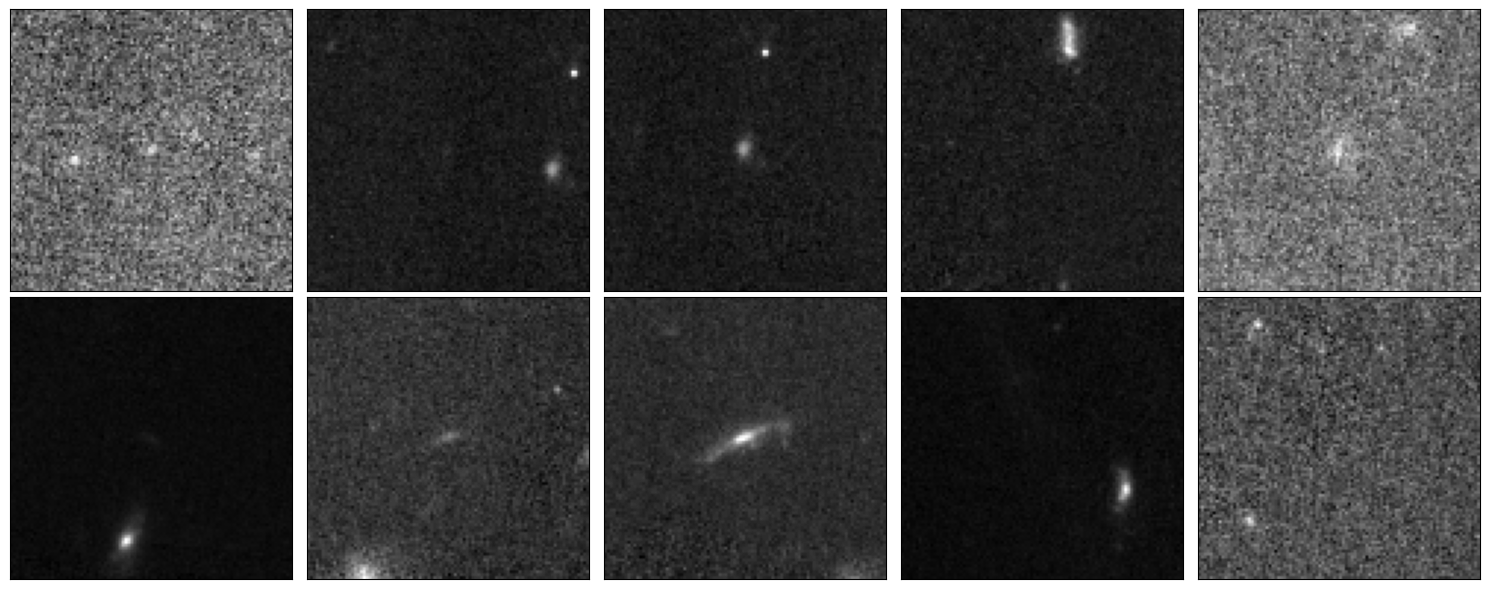

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Check if there are at least 10 stamps; if not, use the total number of stamps
num_stamps = min(10, len(JWST_stamps))
print(num_stamps)

# Generate random indices
indices = np.random.choice(len(JWST_stamps), size=num_stamps, replace=False)

# Use the indices to select the stamps
selected_stamps = [JWST_stamps[i] for i in indices]

# Create a figure and axes with 2 rows and 5 columns
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# Flatten the array of axes to make indexing easier
axs_flat = axs.flatten()

# Loop through the selected stamps and the flattened axes
for stamp, ax in zip(selected_stamps, axs_flat):
    # Display the stamp on the current axis
    print(stamp.shape)
    ax.imshow(stamp, origin='lower', cmap='gray')
    # Remove the axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

# Hide any unused axes if there are less than 10 stamps
for i in range(num_stamps, 10):
    axs_flat[i].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [221]:
import os
import argparse
from astropy.table import Table, join
import astropy.units as u
from multiprocessing import Pool
#import healpy as hp
import numpy as np
import h5py
from tqdm import tqdm
import pdb

_filters = ['jwst_nircam_f200w']
_utf8_filter_type = h5py.string_dtype('utf-8', 5)
_image_size = 96 # to be decided
#_pixel_scale = JWST_PIXEL_SCALE

_filter_list = ['f200w'] # add filters here


def download_jwst_DJA(base_url,output_directory,field_identifier):

    # make sure the output directory exists
    try:
        os.chdir(output_directory)
        os.chdir('..')
    except:
        print('output directory not found, made the dir.')
        os.mkdir(output_directory)


    # Download the index.html file
    file = wget.download(base_url)

    # Read the content of the file
    with open(file, "r") as f:
        file_content = f.read()

    # Parse the HTML content
    soup = BeautifulSoup(file_content, 'html.parser')

    jwstfiles = []
    for temp in soup.find_all('a'):
        if (field_identifier in temp['href']) and ('_sci' in temp['href']):
            jwstfiles.append(temp['href'])

    # Print and download files
    for url in jwstfiles:
        # Extract the filename from the URL
        filename = url.split('/')[-1]
        
        # Determine the filter from the filename
        temp = filename.split('_')[0].split('-')
        if temp[-1] != 'clear':
            filter_name = temp[-1]
        else:
            filter_name = temp[-2]

        # Print filter info and URL
        #print('\nfilter: ', filter_name)
        #print('url: ', url)

        # Construct the full local filepath
        full_local_path = os.path.join(output_directory, filename)

        # Download the file to the specified output directory
        if (filter_name in _filter_list) and (not os.path.isfile(full_local_path)):
            wget.download(url, out=full_local_path)

    # for the photometry table
    for temp in soup.find_all('a'):
        if (field_identifier in temp['href']) & ('photoz' in temp['href']):
            #print(temp['href'])
            photoz_url = temp['href']
        if (field_identifier in temp['href']) & ('phot_apcorr.fits' in temp['href']):
            #print(temp['href'])
            phot_url = temp['href']

    # download the photoz file
    filename = photoz_url.split('/')[-1]
    full_local_path = os.path.join(output_directory, filename)
    if not os.path.isfile(full_local_path):
        file = wget.download(photoz_url, out=full_local_path)
         # unzip the file
        tar = tarfile.open(file)
        tar.extractall(path=output_directory)
        tar.close()

    # download photometric catalog
    filename = phot_url.split('/')[-1]
    full_local_path = os.path.join(output_directory, filename)
    if not os.path.isfile(full_local_path):
        wget.download(phot_url, out=full_local_path)
    phot_table = Table.read(full_local_path)

   

    # read it in as a table
    fnames = os.listdir(output_directory)
    for fname in fnames:
        if 'eazypy.zout' in fname:
            photz_table = Table.read(output_directory + fname)

    joint_table = join(phot_table, photz_table, )
    # print(len(phot_table.keys()), len(photoz_table.keys()), len(joint_table.keys()))
    
#phot_table
    return joint_table


def _cut_stamps_fn(directory_path,output_directory,phot_table,field_identifier,subsample='all'):
    
    #image_size = 96

    # Set the directory path
    #output_directory = '/Users/marchuertascompany/Documents/data/astropile/ceers/'
    #directory_path = output_directory

    # Pattern to match files starting with 'ceers' and ending with 'fits.gz'
    pattern = field_identifier+'*fits.gz'

    # Construct the full path pattern
    full_path_pattern = os.path.join(directory_path, pattern)

    # List all matching files
    matching_files = glob.glob(full_path_pattern)

    if subsample == 'all':
        # Use all entries in phot_table
        subsample_indices = np.arange(len(phot_table))  # This will create an iterable over all indices
    else:
        # Use the first 'subsample' number of entries in phot_table
        subsample_indices = np.random.choice(len(phot_table), size=subsample, replace=False) # Ensures subsample does not exceed actual size

    print("filters:",_filter_list)
    for f in _filter_list:
        print(f)
        # Loop over the matching files
        for file_path in matching_files:
            print(file_path)  # Print the file path or do something with the file
            #print(f)
            pickle_filename = output_directory+'jwst_'+field_identifier+'_'+f+'_sample_'+str(subsample)+'_forastropile.pkl'  # Update the path as needed
                
            if f in file_path and not os.path.isfile(pickle_filename):
                print('reading filter '+f)
                im = fits.open(file_path)
                sci=im['PRIMARY'].data
                wcs = WCS((im['PRIMARY'].header))
                pixel_scale = get_pixel_scale(im['PRIMARY'].header)
                # Define the filename for the pickle file
                



                ravec=[]
                decvec=[]
                JWST_stamps=[]
                idvec=[]
                for idn, ra,dec in zip(phot_table['object_id'][subsample_indices].value, phot_table['ra'][subsample_indices].value, phot_table['dec'][subsample_indices].value):
                    try:
                       
                        position = SkyCoord(ra,dec,unit="deg")
                        #print(ra,dec)
                        stamp = Cutout2D(sci,position,_image_size,wcs=wcs)
                        #print(stamp.data.shape)
                        if np.max(stamp.data)<=0 or np.count_nonzero(stamp.data==0)>10 or stamp.data.shape[0]!=_image_size or stamp.data.shape[1]!=_image_size:
                            #print('empty stamp')
                            JWST_stamps.append(np.zeros((_image_size,_image_size)))
                            idvec.append(idn)
                        
                            ravec.append(ra)
                            decvec.append(dec) 
                            continue
                        
                        #transform = AsinhStretch() + interval
                        #norm = transform(stamp.data)  
                        norm = stamp.data
                        #print(norm.shape)
                        #pdb.set_trace()
                        #stamp_name = data_path+"NirCam/CANDELS_stamps/v005/f200fullres/CANDELS-CEERS"+str(idn)+"_f200w_v005.fits"
                        JWST_stamps.append(norm)
                        idvec.append(idn)
                        
                        ravec.append(ra)
                        decvec.append(dec)  
                        #if (fsph>0.66 and fdk<0.66 and firr<0.1):
                        #    label.append(1)
                        #else:
                        #    label.append(0)
                    
                        
                    except:
                        print('error..appending a blank image')
                        JWST_stamps.append(np.zeros((_image_size,_image_size)))
                        idvec.append(idn)
                        
                        ravec.append(ra)
                        decvec.append(dec) 
                        #continue
            

                

                # Open a file for writing the pickle data
                with open(pickle_filename, 'wb') as pickle_file:
                    # Create a dictionary to store your lists
                    data_to_store = {
                        'JWST_stamps': JWST_stamps,
                        'idvec': idvec,
                        'ravec': ravec,
                        'decvec': decvec,
                        'phot_table': phot_table[subsample_indices],
                        'pixel_scale': pixel_scale
                    }
                    # Use pickle.dump() to store the data in the file
                    pickle.dump(data_to_store, pickle_file)

                print(f'Data stored in {pickle_filename}')
    return 1




def _processing_fn(args):
    output_folder, field_identifier, subsample = args

    if not os.path.exists(os.path.dirname(output_folder)):
        os.makedirs(os.path.dirname(output_folder))

    #output_filename = os.path.join(output_folder,field_identifier+'.hdf5')
    filter_string = '-'.join(_filter_list)
    # count how many times we run into problems with the images
    n_problems = 0

    # Create an empty list to store images
    images = []

    
    
    # Initialize the dictionary
    JWST_multilambda = {}
    for f in _filter_list:
        pickle_filename = output_directory+'jwst_'+field_identifier+'_'+f+'_sample_'+str(subsample)+'_forastropile.pkl'  # Update the path as needed
        with open(pickle_filename, 'rb') as pfile:
            data_loaded = pickle.load(pfile)

            # Accessing the lists from the loaded data
            JWST_stamps = data_loaded['JWST_stamps']
        
        # assumng these are all the same for all objects
        idvec = data_loaded['idvec']
        ravec = data_loaded['ravec']
        decvec = data_loaded['decvec']
        catalog = data_loaded['phot_table']
        pixel_scale = data_loaded['pixel_scale']

        #print(np.array(JWST_stamps).shape)
        JWST_multilambda[f] = np.array(JWST_stamps)


         # Add healpix index to the catalog
        catalog['index'] = np.arange(len(catalog))

        catalog['healpix'] = hp.ang2pix(64, catalog['ra'], catalog['dec'], lonlat=True, nest=True)
    
        # Group objects by healpix index
        groups = catalog.group_by('healpix')

    # Loop over the groups
    #map_args = []
    for group in groups.groups:
        # Create a filename for the group
        group_filename = os.path.join(output_folder, '{}/healpix={}/001-of-001.hdf5'.format(field_identifier+'_'+str(subsample)+'_'+str(_image_size)+'_'+filter_string,group['healpix'][0]))
        #map_args.append((group, cutouts_filename, group_filename))
        # Extract the directory path from the group_filename
        directory_path = os.path.dirname(group_filename)

        # Check if the directory exists
        if not os.path.exists(directory_path):
            # If the directory does not exist, create it
            os.makedirs(directory_path)

        
       


    # Loop over the indices and yield the requested data
    #for c, id, ra, dec in zip(range(len(idvec)),idvec, ravec,decvec):
    for row in group:
        c = row['index']  # Assuming there is an 'index' column specifying the object's index
        id = row['object_id']  # Assuming there is an 'id' column
        #ra = row['ra']  # Assuming there is a 'ra' column
        #dec = row['dec']  # Assuming there is a 'dec' column

        key = str(id)

          

        # Get the smallest shape among all images
        stamp = JWST_multilambda[f][c]
        s_x=stamp.shape[0]
        s_y=stamp.shape[1]
        #s_x = min([stamp.shape[0] for f in filter_list])
        #s_y = min([stamp.shape[1] for f in filter_list])

            # Raise a warning if one of the images has a different shape than 'smallest_shape'
        #for f in filter_list:
        #    if stamp.shape != (s_x, s_y):
        #        #print(JWST_multilambda[f].shape)
        #        print(f"The image for object {key} has a different shape depending on the band. It's the {n_problems+1}th time this happens.")
        #        n_problems += 1
        #        break

            # Crop the images to the smallest shape
        image = np.stack([
                JWST_multilambda[f][c][:s_x, :s_y].astype(np.float32) for f in _filter_list
            ], axis=0).astype(np.float32)
            
            # Cutout the center of the image to desired size
        s = image.shape
        #print(s)
        center_x = s[1] // 2
        start_x = center_x - _image_size // 2
        center_y = s[2] // 2
        start_y = center_y - _image_size // 2
        image = image[:,
                        start_x:start_x+_image_size, 
                        start_y:start_y+_image_size]
        assert image.shape == (len(_filter_list),_image_size, _image_size), ("There was an error in reshaping the image to desired size", image.shape, s )

            # Compute the PSF FWHM in arcsec
            #psf_fwhm = []
            #for f in _filters:
            #    b = f.lower().split('-')[-1]
            #    psf_mxx = row[f'{b}_sdssshape_psf_shape11']
            #    psf_myy = row[f'{b}_sdssshape_psf_shape22']
            #    psf_mxy = row[f'{b}_sdssshape_psf_shape12']
            #    psf_fwhm.append(2.355 * (psf_mxx * psf_myy - psf_mxy**2)**(0.25)) # in arcsec
            #psf_fwhm = np.array(psf_fwhm).astype(np.float32)

            # Initialize the example with image data
        #print(np.zeros((image.shape[1],image.shape[2])).shape)
        images.append({
                    'object_id': id,
                    'image_band': np.array([f.lower().encode("utf-8") for f in _filters], dtype=_utf8_filter_type),
                    'image_array': image,
                    'image_psf_fwhm': image,
                    'image_scale': np.array([pixel_scale for f in _filters]).astype(np.float32),
                })
    # Aggregate all images into an astropy table
    images = Table({k: [d[k] for d in images] for k in images[0].keys()})

    # Join on object_id with the input catalog
    catalog = join(catalog, images, keys='object_id', join_type='inner')

    # Making sure we didn't lose anyone
    assert len(catalog) == len(images), "There was an error in the join operation"

    # Save all columns to disk in HDF5 format
    with h5py.File(group_filename, 'w') as hdf5_file:
        for key in catalog.colnames:
            hdf5_file.create_dataset(key, data=catalog[key])

    return 1


In [222]:
base_url = 'https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/index.html'
output_directory = '/Users/marchuertascompany/Documents/data/astropile/ceers/'
field_identifier='ceers-full-grizli-v7.2'
directory_path = '/Users/marchuertascompany/Documents/data/astropile/ceers/'
subsample = 'all'

_filters = ['jwst_nircam_f115w','jwst_nircam_f150w','jwst_nircam_f200w','jwst_nircam_f277w','jwst_nircam_f356w','jwst_nircam_f444w']
_utf8_filter_type = h5py.string_dtype('utf-8', 17)
_image_size = 32 # to be decided
_filter_list = ['f115w','f150w','f200w','f277w','f356w','f444w'] # add filters here


print('downloading data')
phot_table=download_jwst_DJA(base_url,output_directory,field_identifier)
phot_table.rename_column('id','object_id')
print('cutting stamps')
_cut_stamps_fn(directory_path,output_directory,phot_table,field_identifier,subsample=subsample)
print('saving to hdf5')
_processing_fn([output_directory,field_identifier,subsample])



downloading data


cutting stamps
filters: ['f115w', 'f150w', 'f200w', 'f277w', 'f356w', 'f444w']
f115w
/Users/marchuertascompany/Documents/data/astropile/ceers/ceers-full-grizli-v7.2-f356w-clear_drc_sci.fits.gz
/Users/marchuertascompany/Documents/data/astropile/ceers/ceers-full-grizli-v7.2-f444w-clear_drc_sci.fits.gz
/Users/marchuertascompany/Documents/data/astropile/ceers/ceers-full-grizli-v7.2-f150w-clear_drc_sci.fits.gz
/Users/marchuertascompany/Documents/data/astropile/ceers/ceers-full-grizli-v7.2-f200w-clear_drc_sci.fits.gz
/Users/marchuertascompany/Documents/data/astropile/ceers/ceers-full-grizli-v7.2-f277w-clear_drc_sci.fits.gz
/Users/marchuertascompany/Documents/data/astropile/ceers/ceers-full-grizli-v7.2-f115w-clear_drc_sci.fits.gz
reading filter f115w
Data stored in /Users/marchuertascompany/Documents/data/astropile/ceers/jwst_ceers-full-grizli-v7.2_f115w_sample_all_forastropile.pkl
f150w
/Users/marchuertascompany/Documents/data/astropile/ceers/ceers-full-grizli-v7.2-f356w-clear_drc_sci.fits.g

1

In [141]:
_processing_fn([['f200w'],'/Users/marchuertascompany/Documents/data/astropile/ceers/'])

1

In [43]:
t='jwst_nircam_f115w'


NameError: name 'JWST_multilambda' is not defined